# Lista 3 de Mineração de Dados

a) Ler o dataset fakeTelegram.BR_2022.csv, o qual está disponível no link a seguir:
https://drive.google.com/file/d/1c_hLzk85pYw-huHSnFYZM_gndUsYRDm/view?usp=drive_link

In [2]:
import pandas as pd

df = pd.read_csv('fakeTelegram.BR_2022.csv')
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


b)  Remova os trava-zaps. 

In [3]:
df = df[~df['trava_zap']].reset_index(drop=True)
print(f"Total de linhas que sobraram: {len(df)}")

Total de linhas que sobraram: 557570


c)  Remover as linhas repetidas (duplicadas).

In [4]:
duplicadas = df[df.duplicated()]
print(duplicadas)

qtd_duplicadas = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {qtd_duplicadas}")

Empty DataFrame
Columns: [date_message, id_member_anonymous, id_group_anonymous, media, media_type, media_url, has_media, has_media_url, trava_zap, text_content_anonymous, dataset_info_id, date_system, score_sentiment, score_misinformation, id_message, message_type, messenger, media_name, media_md5]
Index: []
Quantidade de linhas duplicadas: 0


d) Remover textos com menos de 5 palavras. 


In [5]:
df = df[df["text_content_anonymous"].astype(str).apply(lambda x: len(x.split()))>=5]
print(f"Total de linhas que sobraram: {len(df)}")

Total de linhas que sobraram: 339286


e) Para cada atributo numérico apresente:

1. Medidas de Tendência Central 


In [6]:

mediaSent = df["score_sentiment"].mean()
modaSent = df['score_sentiment'].mode()
medianaSent = df["score_sentiment"].median()

print(f"A media de score_sentiment é: {mediaSent}")
print(f"A moda de score_sentiment é: {modaSent[0]}")
print(f"A mediana de score_sentiment é: {medianaSent}")
print("\n")

mediaMisin = df["score_misinformation"].mean()
modaMisin = df['score_misinformation'].mode()
medianaMisin = df["score_misinformation"].median()

print(f"A media de score_misinformation é: {mediaMisin}")
print(f"A moda de score_misinformation é: {modaMisin[0]}")
print(f"A mediana de score_misinformation é: {medianaMisin}")

A media de score_sentiment é: 0.022024824975901948
A moda de score_sentiment é: 0.0
A mediana de score_sentiment é: 0.0


A media de score_misinformation é: 0.31226279277651897
A moda de score_misinformation é: 0.1106282729517939
A mediana de score_misinformation é: 0.1975916828520037


2. Medidas de Variabilidade 


In [ ]:
#variancia, desvio padrão e amplitude
varianciaSent = df["score_sentiment"].var()
DesvioSent = df["score_sentiment"].std()
AmpliSent = df["score_sentiment"].max() -  df["score_sentiment"].min()

print(f"A variância de score_sentiment é: {varianciaSent}")
print(f"O desvio padrão de score_sentiment é: {DesvioSent}")
print(f"A amplitude de score_sentiment é: {AmpliSent}")
print("\n")

varianciaMisin = df["score_misinformation"].var()
DesvioMisin = df["score_misinformation"].std()
AmpliMisin = df["score_misinformation"].max() -  df["score_misinformation"].min()

print(f"A variância de score_misinformation é: {varianciaMisin}")
print(f"O desvio padrão de score_misinformation é: {DesvioMisin}")
print(f"A amplitude de score_misinformation é: {AmpliMisin}")

A variância de score_sentiment é: 0.28060788667618014
O desvio padrão de score_sentiment é: 0.5297243497104698
A amplitude de score_sentiment é: 1.9992


A variância de score_misinformation é: 0.0862614241446864
O desvio padrão de score_misinformation é: 0.29370295222330745
A amplitude de score_misinformation é: 0.9999967097077009


3. Tabela de Frequência e Histograma 


    Tabela de Frequência

In [ ]:
print("Frequência - score_sentiment: \n")

print(pd.cut(df['score_sentiment'], bins=5).value_counts().sort_index().to_string())

print("\nFrequência - score_misinformation: \n")


print(pd.cut(df['score_misinformation'], bins=5).value_counts().sort_index().to_string())

Frequência - score_sentiment: 

------------------------
score_sentiment
(-1.002, -0.6]     53672
(-0.6, -0.2]       55582
(-0.2, 0.2]       108232
(0.2, 0.599]       65815
(0.599, 0.999]     55938
------------------------

Frequência - score_misinformation: 

-------------------------
score_misinformation
(-0.000997, 0.2]    84212
(0.2, 0.4]          32009
(0.4, 0.6]          18593
(0.6, 0.8]          14464
(0.8, 1.0]          17946
-------------------------


    Histograma

In [86]:
! pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\Clara Alyne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


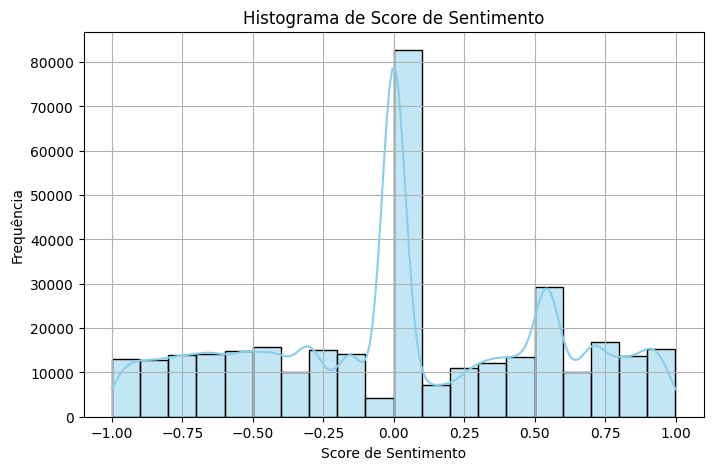

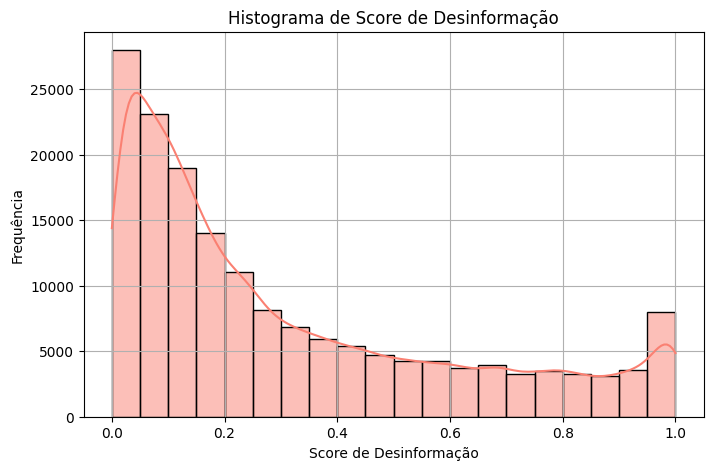

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma - Score de Sentimento
plt.figure(figsize=(8, 5))
sns.histplot(df['score_sentiment'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Histograma de Score de Sentimento')
plt.xlabel('Score de Sentimento')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma - Score de Desinformação
plt.figure(figsize=(8, 5))
sns.histplot(df['score_misinformation'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Histograma de Score de Desinformação')
plt.xlabel('Score de Desinformação')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

4. Boxplot 

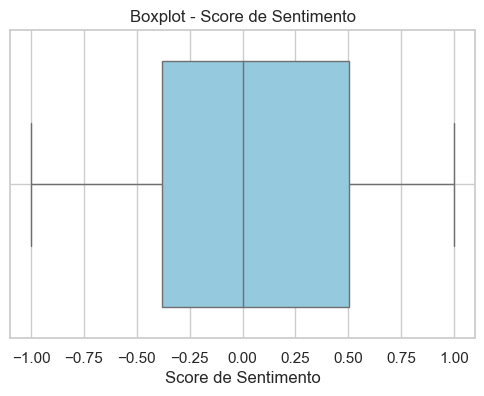

In [87]:
#Score de Sentimento
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['score_sentiment'], color='skyblue')
plt.title('Boxplot - Score de Sentimento')
plt.xlabel('Score de Sentimento')
plt.grid(True)
plt.show()


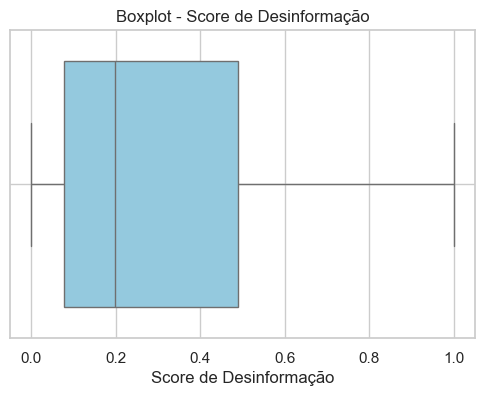

In [88]:
#Score de Desinformação
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['score_misinformation'], color='skyblue')
plt.title('Boxplot - Score de Desinformação')
plt.xlabel('Score de Desinformação')
plt.grid(True)
plt.show()

#### 5. QQ-Plot 


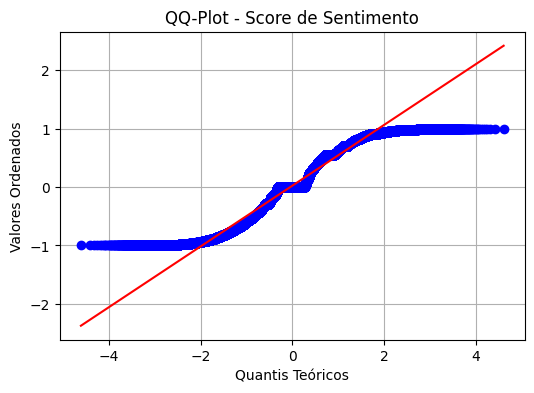

In [77]:
import scipy.stats as stats

#Score de Sentimento
plt.figure(figsize=(6, 4))
stats.probplot(df['score_sentiment'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot - Score de Sentimento')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.grid(True)
plt.show()


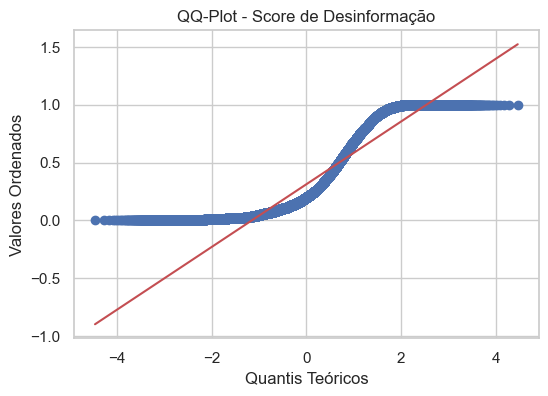

In [90]:
#Score de Desinformação
plt.figure(figsize=(6, 4))
stats.probplot(df['score_misinformation'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot - Score de Desinformação')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.grid(True)
plt.show()

#### 6. Teste de Normalidade 

In [ ]:

# Teste Shapiro-Wilk - score_sentiment
stat_sent, p_sent = shapiro(df['score_sentiment'].dropna())
print(f"Shapiro-Wilk - score_sentiment: Estatística={stat_sent:.4f}, p-valor={p_sent:.4f}")
if p_sent > 0.05:
    print("  --> Distribuição provavelmente NORMAL")
else:
    print("  --> Distribuição provavelmente NÃO normal")

# Teste Shapiro-Wilk - score_misinformation
stat_mis, p_mis = shapiro(df['score_misinformation'].dropna())
print(f"\nShapiro-Wilk - score_misinformation: Estatística={stat_mis:.4f}, p-valor={p_mis:.4f}")
if p_mis > 0.05:
    print("  --> Distribuição provavelmente NORMAL")
else:
    print("  --> Distribuição provavelmente NÃO normal")


Shapiro-Wilk - score_sentiment: Estatística=0.9623, p-valor=0.0000
  --> Distribuição provavelmente NÃO normal

Shapiro-Wilk - score_misinformation: Estatística=0.8555, p-valor=0.0000
  --> Distribuição provavelmente NÃO normal


#### 7. Best Fit Distribution (usando diferentes métodos) 


In [80]:
score_sentiment = stats.zscore(df["score_sentiment"].dropna())
score_misinformation = stats.zscore(df["score_misinformation"].dropna())


dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = stats.kstest(y_std, distribution, args=param)
        else:
            D, p = stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)


check_distribution(dist_names, score_sentiment)
check_distribution(dist_names, score_misinformation)

C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.118133      0.0  no
1         expon  0.247640      0.0  no
2         gamma  0.118313      0.0  no
3       lognorm  0.119462      0.0  no
4          norm  0.121389      0.0  no
5      pearson3  0.131719      0.0  no
6             t  0.121389      0.0  no
7        triang  0.118001      0.0  no
8       uniform  0.123734      0.0  no
9   weibull_min  0.114765      0.0  no
10  weibull_max  0.143500      0.0  no


C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
2         gamma  0.046504  1.031017e-314  no
5      pearson3  0.046717  1.371811e-317  no
0          beta  0.103236   0.000000e+00  no
1         expon  0.048703   0.000000e+00  no
3       lognorm  0.068495   0.000000e+00  no
4          norm  0.155688   0.000000e+00  no
6             t  0.155688   0.000000e+00  no
7        triang  0.175655   0.000000e+00  no
8       uniform  0.321929   0.000000e+00  no
9   weibull_min  0.047426   0.000000e+00  no
10  weibull_max  0.114586   0.000000e+00  no


f) Para cada par de atributos numéricos apresente: 

1. O Coeficiente de Correlação apropriado 

In [ ]:
from scipy.stats import spearmanr

nnulo = df[df["score_misinformation"].notnull()] #tirando valores nulos
nnulo = nnulo["score_sentiment"]

coef, p_value = spearmanr(nnulo, score_misinformation)

print(f'Coeficiente de Spearman: {coef:.4f}')
print(f'Valor-p: {p_value:.4f}')

Coeficiente de Spearman: -0.3885
Valor-p: 0.0000


2. Um Gráfico de Dispersão 

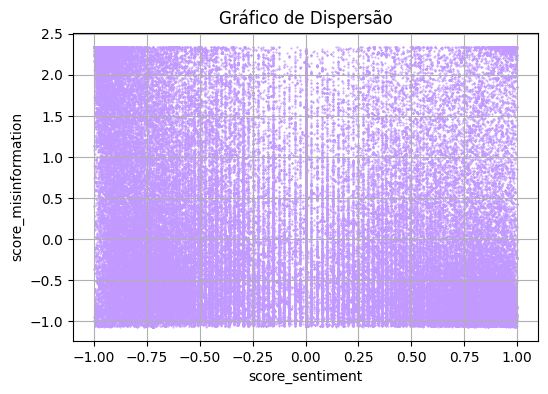

In [83]:


plt.figure(figsize=(6, 4))
plt.scatter(nnulo, score_misinformation, color='#c299ff', marker='o', s=0.2)
plt.title('Gráfico de Dispersão')
plt.xlabel("score_sentiment")
plt.ylabel("score_misinformation")
plt.grid(True)
plt.show()

g) Para cada par de atributos categóricos apresente: 

1. V de Cramer

In [10]:

df1 = df[[i for i in df.columns if i in ('media_type','message_type','has_media','has_media_url' )]]

df1.head()

,media_type,has_media,has_media_url,message_type
0,NaN,False,False,Texto
1,NaN,False,False,Texto
2,NaN,False,False,Texto
3,image/jpg,True,False,Imagem
5,NaN,False,False,Texto


In [ ]:
! pip install scikit-learn

In [11]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df1.columns :
  data_encoded[i]=label.fit_transform(df1[i])

  data_encoded.head()

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) #tabela cruzada
  stat = chi2_contingency(crosstab)[0] #teste do qui quadrado
  obs = np.sum(crosstab) #Numero de observações
  mini = min(crosstab.shape)-1 #Pega o valor mínimo entre as colunas e as linhas da tabela cruzada
  return (stat/(obs*mini)) # Calcula e retorna o Cramér's V

In [ ]:
#Calcula a matriz de associação e coloca o resultado em um dataframe
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) 
    col.append(round(cramers,2)) 
  rows.append(col)
  
cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df2

,media_type,has_media,has_media_url,message_type
media_type,1.00,1.00,0.47,0.87
has_media,1.00,1.00,0.23,1.00
has_media_url,0.47,0.23,1.00,0.47
message_type,0.87,1.00,0.47,1.00


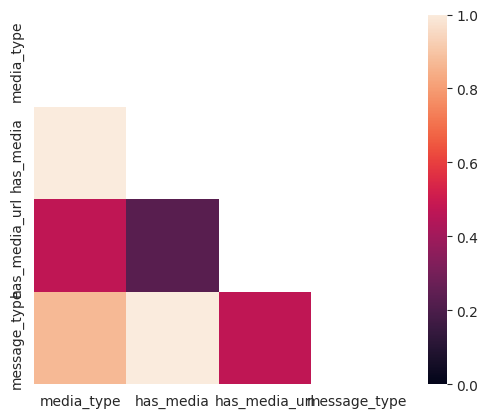

In [14]:
import matplotlib.pyplot as plt

mask = np.zeros_like(df2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df2, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

h) Crie uma visualização (gráfico) para apresentar: 

In [ ]:
! pip install duckdb

In [15]:
import duckdb

conexao = duckdb.connect()
conexao.register('fake_telegram', df)

1. As quantidades de grupos, usuários e mensagens;

In [16]:
resultado = conexao.execute("""SELECT COUNT(id_message) AS quantidade_mensagens, 
                            COUNT(DISTINCT id_member_anonymous) AS quantidade_membros, 
                            COUNT(DISTINCT id_group_anonymous) AS quantidade_grupos
                            FROM fake_telegram""").fetchdf()
resultado

,quantidade_mensagens,quantidade_membros,quantidade_grupos
0,339286,11366,177


2. A quantidade de mensagens que possuem apenas texto X mídia;

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


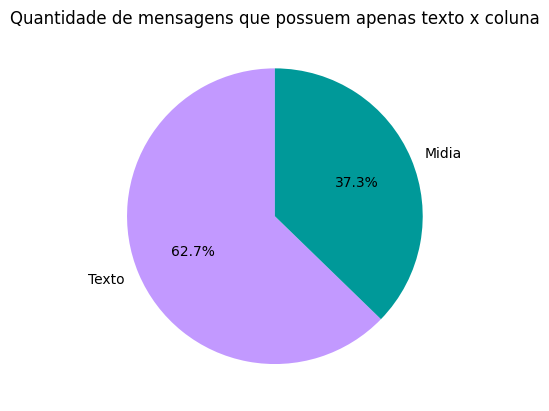

In [94]:
resultado = conexao.execute("""SELECT COUNT (message_type) AS quantidade_mensagem
                            FROM fake_telegram
                            WHERE message_type LIKE '%Texto%'""").fetchdf()

resultado1 = conexao.execute("""SELECT COUNT (has_media) AS quantidade_mensagem
                                FROM fake_telegram
                                WHERE has_media = True""").fetchdf()

resultado2 = pd.concat([resultado,resultado1], ignore_index=True)


labels = ['Texto', 'Midia']
cores = ['#c299ff', '#009999']
plt.axis('equal')
plt.title('Quantidade de mensagens que possuem apenas texto x coluna')
plt.pie(resultado2["quantidade_mensagem"], labels=labels, colors=cores, autopct='%1.1f%%', startangle=90)
plt.show()



3. Quantidade de mensagens por tipo de mídia (jpg, mp4 etc); 

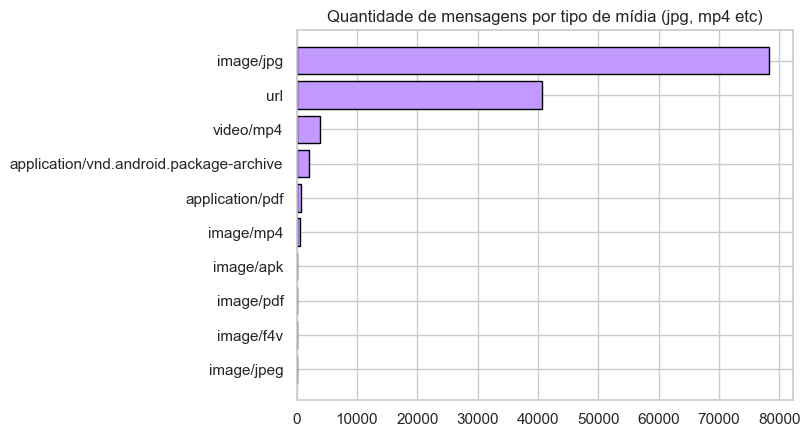

In [171]:
resultado = conexao.execute("""SELECT media_type, COUNT (media_type) AS mensagens
                              FROM fake_telegram
                              WHERE media_type IS NOT NULL
                              GROUP BY media_type
                              ORDER BY mensagens DESC LIMIT 10 """).fetchdf()

resultado = resultado.sort_values("mensagens")

plt.title('Quantidade de mensagens por tipo de mídia (jpg, mp4 etc)')
plt.barh(resultado["media_type"], resultado["mensagens"], color='#c299ff', edgecolor='black')
plt.show()


4. A relação entre a quantidade de mensagens e a quantidade de palavras
presente nas mensagens; 

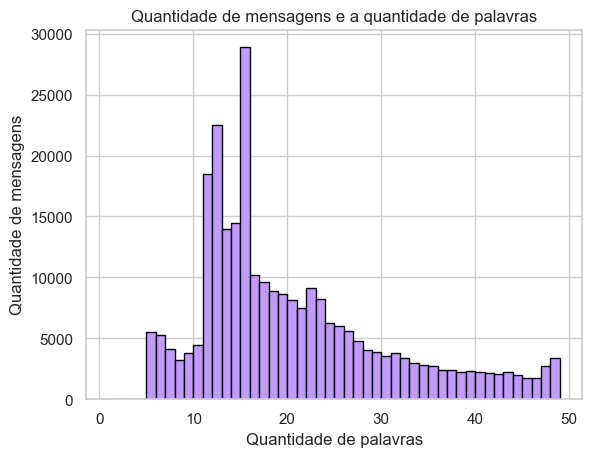

In [ ]:
resultado = df["text_content_anonymous"].astype(str).apply(lambda x: len(x.split())) #coluna com quantidade de palavras por mensagem

plt.hist(resultado, bins= range (1,50), color='#c299ff', edgecolor='black')
plt.title('Quantidade de mensagens e a quantidade de palavras')
plt.xlabel('Quantidade de palavras')
plt.ylabel('Quantidade de mensagens')

plt.show()

10. As 30 URLs que mais se repetem (mais compartilhadas); 


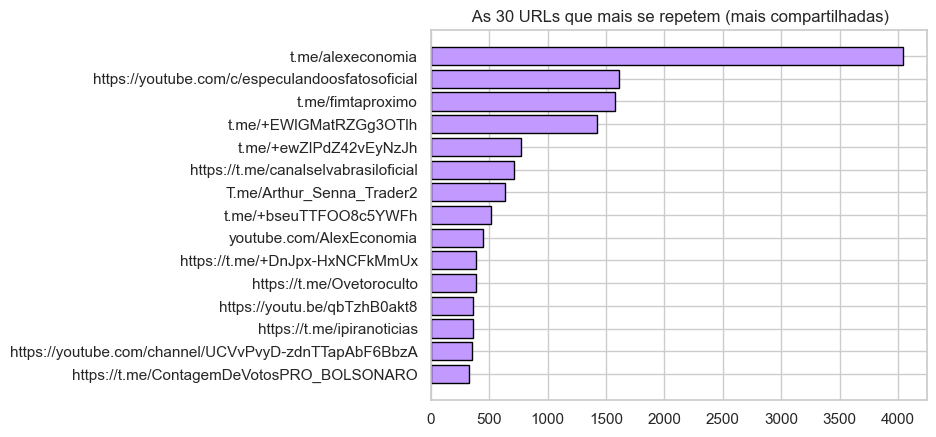

In [183]:
resultado = conexao.execute(""" SELECT media_url, COUNT (media_url) AS quantidade
                                FROM fake_telegram
                                GROUP BY media_url
                                ORDER BY quantidade
                                DESC LIMIT 15""").fetchdf()

resultado = resultado.sort_values("quantidade")

plt.title(' As 30 URLs que mais se repetem (mais compartilhadas)')
plt.barh(resultado["media_url"], resultado["quantidade"], color='#c299ff', edgecolor='black')
plt.show()

11. Os 30 domínios que mais se repetem (mais compartilhados); 


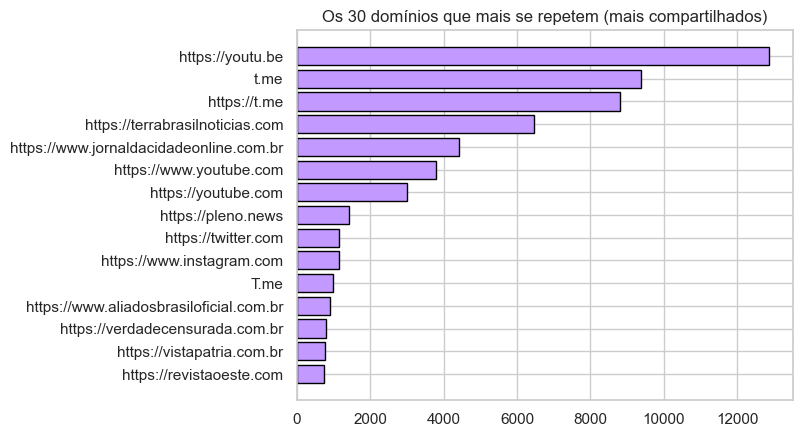

In [189]:
resultado = conexao.execute("""
    SELECT
        REGEXP_EXTRACT(media_url, '^(?:https?://)?(?:www\\.)?([^/]+)') AS dominio,
        COUNT(*) AS total
    FROM fake_telegram
    WHERE media_url IS NOT NULL AND TRIM(media_url) != ''
    GROUP BY dominio
    ORDER BY total DESC LIMIT 15
""").fetchdf()

resultado = resultado.sort_values("total")

plt.title('Os 30 domínios que mais se repetem (mais compartilhados)')
plt.barh(resultado["dominio"], resultado["total"], color='#c299ff', edgecolor='black')
plt.show()



12. Os 30 usuários mais ativos; 


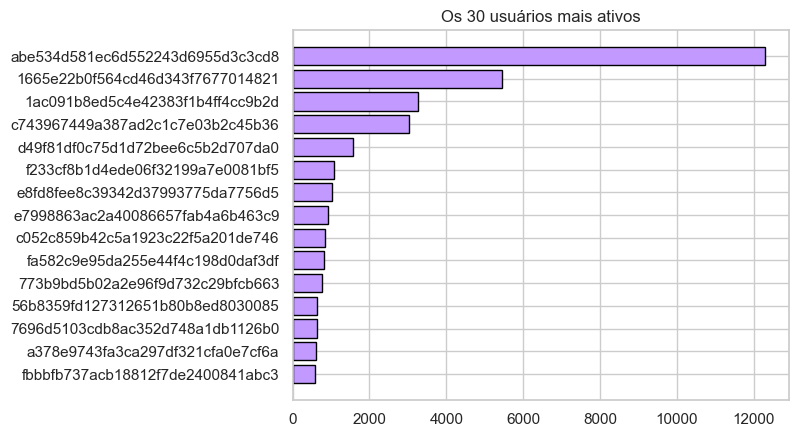

In [191]:
resultado = conexao.execute("""SELECT id_member_anonymous, COUNT (id_member_anonymous)
                            AS total FROM fake_telegram
                            GROUP BY id_member_anonymous
                            ORDER BY total
                            DESC LIMIT 15""").fetchdf()

resultado = resultado.sort_values("total")

plt.title('Os 30 usuários mais ativos')
plt.barh(resultado["id_member_anonymous"], resultado["total"], color='#c299ff', edgecolor='black')
plt.show()

13. Relação entre quantidade de mensagens contendo somente texto e
mensagens contendo mídia dos usuários mais ativos: 

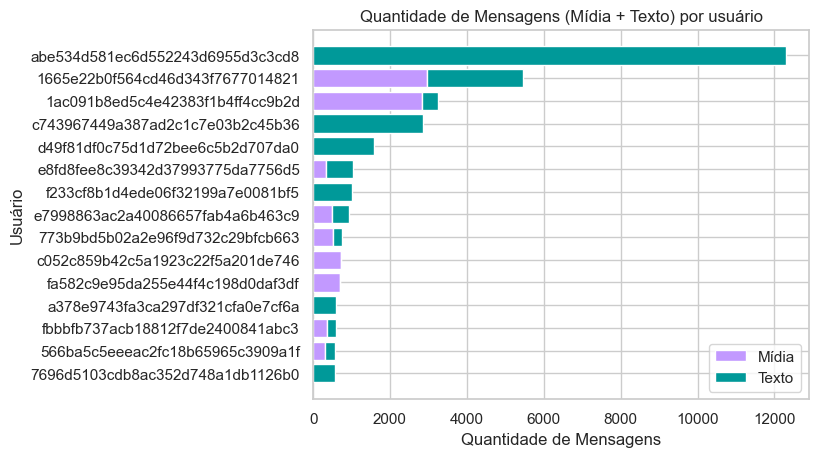

In [240]:
#texto
resultado = conexao.execute("""SELECT id_member_anonymous, COUNT (id_member_anonymous)
                            AS total_texto FROM fake_telegram
                            WHERE message_type = 'Texto'
                            GROUP BY id_member_anonymous
                            ORDER BY total_texto DESC
                            LIMIT 30""").fetchdf()

#midia
resultado1 = conexao.execute("""SELECT id_member_anonymous, COUNT (id_member_anonymous)
                            AS total_midia FROM fake_telegram
                            WHERE has_media = 'True'
                            GROUP BY id_member_anonymous
                            ORDER BY total_midia DESC
                            LIMIT 30""").fetchdf()


resultado2 = pd.merge(resultado,resultado1, on="id_member_anonymous", how="outer").fillna(0)

resultado2["total"] = resultado2["total_texto"] + resultado2["total_midia"]
resultado2 = resultado2.sort_values("total",ascending=True)
resultado2 = resultado2.tail(15)

plt.barh(resultado2["id_member_anonymous"], resultado2["total_midia"], color='#c299ff', label='Mídia')
plt.barh(resultado2["id_member_anonymous"], resultado2["total_texto"], left=resultado2["total_midia"], color='#009999', label='Texto')

plt.xlabel('Quantidade de Mensagens')
plt.ylabel('Usuário')
plt.title('Quantidade de Mensagens (Mídia + Texto) por usuário')
plt.legend()

plt.show()
 

14. Os 30 usuários que mais compartilharam texto; 


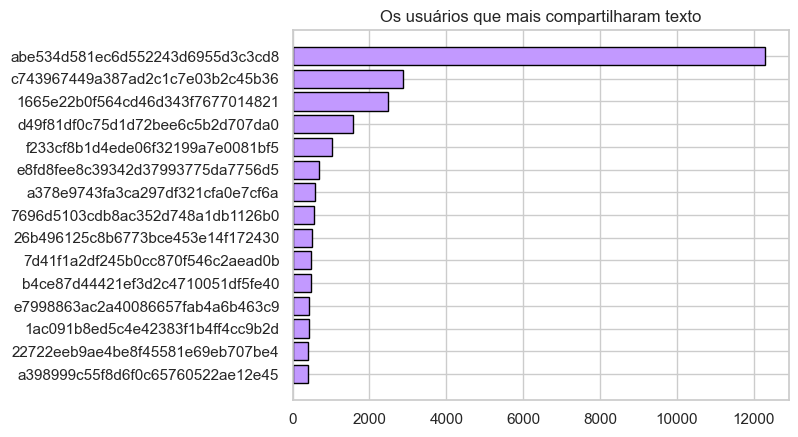

In [248]:
resultado = conexao.execute("""SELECT id_member_anonymous, COUNT (id_member_anonymous)
                            AS total_texto FROM fake_telegram
                            WHERE message_type = 'Texto'
                            GROUP BY id_member_anonymous
                            ORDER BY total_texto DESC
                            LIMIT 15""").fetchdf()

resultado = resultado.sort_values("total_texto")

plt.title('Os usuários que mais compartilharam texto')
plt.barh(resultado["id_member_anonymous"], resultado["total_texto"], color='#c299ff', edgecolor='black')
plt.show()

15. Os 30 usuários que mais compartilharam mídias; 


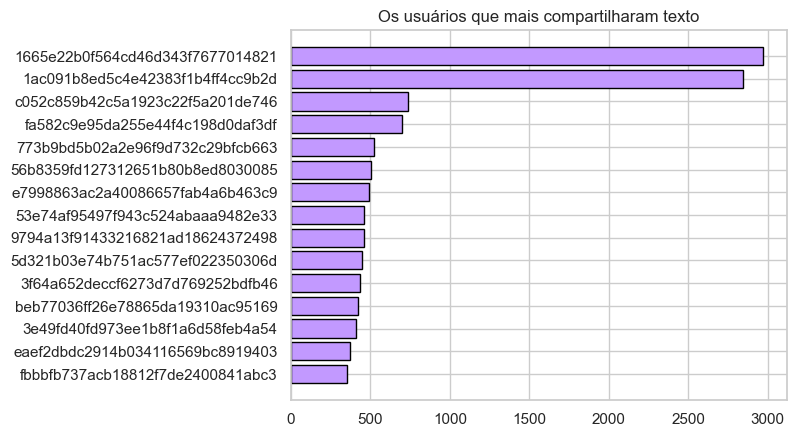

In [249]:
resultado1 = conexao.execute("""SELECT id_member_anonymous, COUNT (id_member_anonymous)
                            AS total_midia FROM fake_telegram
                            WHERE has_media = 'True'
                            GROUP BY id_member_anonymous
                            ORDER BY total_midia DESC
                            LIMIT 15""").fetchdf()

resultado1 = resultado1.sort_values("total_midia")

plt.title('Os usuários que mais compartilharam texto')
plt.barh(resultado1["id_member_anonymous"], resultado1["total_midia"], color='#c299ff', edgecolor='black')
plt.show()

16. As 30 mensagens mais compartilhadas; 

C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftware

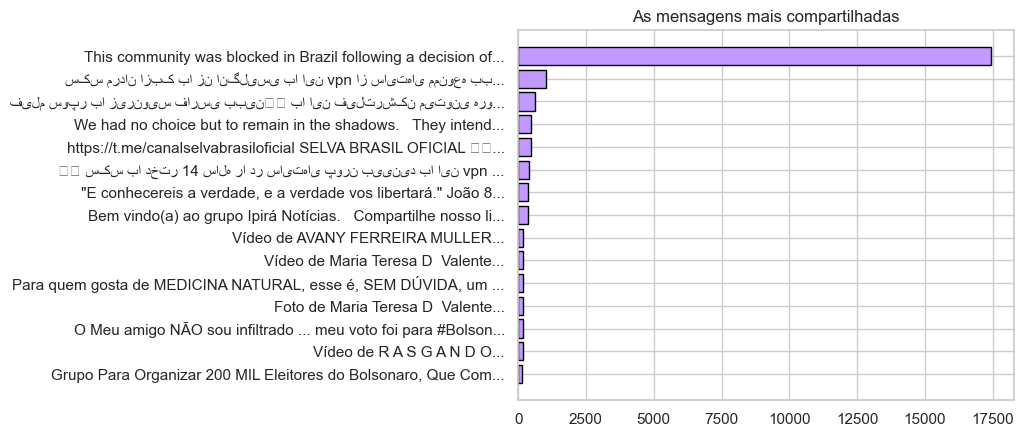

In [308]:
resultado = conexao.execute("""SELECT text_content_anonymous, COUNT (text_content_anonymous)
                            AS total FROM fake_telegram
                            GROUP BY text_content_anonymous
                            ORDER BY total
                            DESC LIMIT 15""").fetchdf()

resultado = resultado.sort_values("total")
resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str[:60] + "..."
resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str.replace("\n"," ")

plt.title('As mensagens mais compartilhadas')
plt.barh(resultado["text_content_anonymous"], resultado["total"], color='#c299ff', edgecolor='black')
plt.show()

17. As 30 mensagens mais compartilhadas em grupos diferentes; 


C:\Users\Clara Alyne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


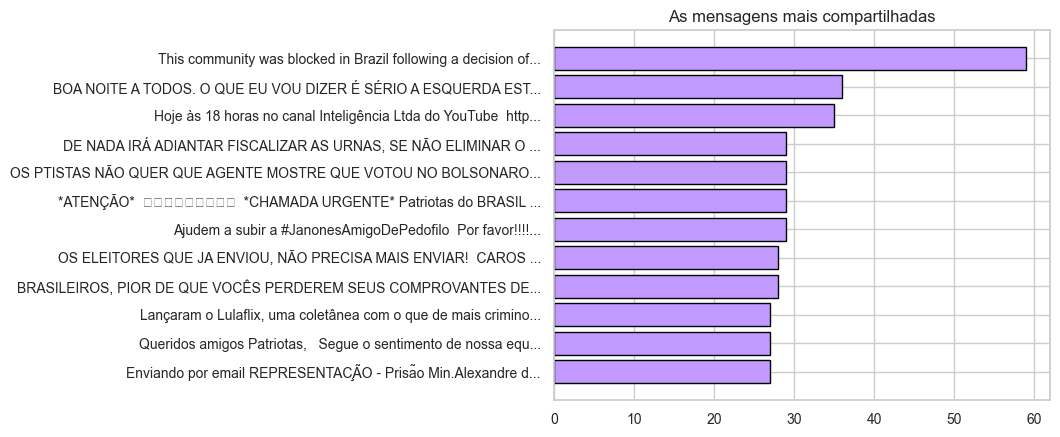

In [305]:
resultado = conexao.execute("""SELECT text_content_anonymous, COUNT (DISTINCT id_group_anonymous)
                            AS total_mensagens FROM fake_telegram
                            WHERE text_content_anonymous IS NOT NULL
                            GROUP BY text_content_anonymous
                            ORDER BY total_mensagens DESC
                            LIMIT 12""").fetchdf()


resultado = resultado.sort_values("total_mensagens")
resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str[:60] + "..."
resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str.replace("\n"," ")

plt.title('As mensagens mais compartilhadas')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.barh(resultado["text_content_anonymous"], resultado["total_mensagens"], color='#c299ff', edgecolor='black')
plt.show()


18. Mensagens idênticas compartilhadas pelo mesmo usuário (e suas
quantidades); 


In [266]:
resultado = conexao.execute("""SELECT id_member_anonymous, text_content_anonymous, COUNT (text_content_anonymous)
                            AS total FROM fake_telegram
                            WHERE text_content_anonymous IS NOT NULL AND id_member_anonymous IS NOT NULL
                            GROUP BY id_member_anonymous, text_content_anonymous
                            ORDER BY total DESC """).fetchdf()

resultado

,id_member_anonymous,text_content_anonymous,total
0,f233cf8b1d4ede06f32199a7e0081bf5,This community was blocked in Brazil following...,838
1,c743967449a387ad2c1c7e03b2c45b36,This community was blocked in Brazil following...,532
2,7696d5103cdb8ac352d748a1db1126b0,This community was blocked in Brazil following...,530
3,1665e22b0f564cd46d343f7677014821,Bem vindo(a) ao grupo Ipirá Notícias. \n\nComp...,357
4,a398999c55f8d6f0c65760522ae12e45,This community was blocked in Brazil following...,308
...,...,...,...
111293,0538a56ab8ee535cfa65204252071892,Olha só esse canalha justificando os atos de b...,1
111294,bb83bf48c31f02bd65346a1cf64c880e,"CONSERVADORES, ELES FARÃO DE TUDO PRA TE DESES...",1
111295,42ed1aff97a55d726376317eb37758b6,Com esse nervosismo até os idiotas vão achar q...,1
111296,4f15c8d403a6f89fc8be1126649669b1,Xandao dia 31 se declara Imperador até a posse...,1


19. Mensagens idênticas compartilhadas pelo mesmo usuário em grupos
distintos (e suas quantidades); 


In [267]:
resultado = conexao.execute("""SELECT id_member_anonymous, text_content_anonymous, COUNT (DISTINCT id_group_anonymous)
                            AS total FROM fake_telegram
                            WHERE text_content_anonymous IS NOT NULL AND id_member_anonymous IS NOT NULL
                            GROUP BY id_member_anonymous, text_content_anonymous
                            ORDER BY total DESC """).fetchdf()
resultado

,id_member_anonymous,text_content_anonymous,total
0,a7840e7844020149e197272748965862,ALERTA\nESSE GRUPO FOI CRIADO PELA ESQUERDA CO...,16
1,326d0a2f1bc5a1ede446fcf5dc31ff2e,💣💥((((( URGENTÍSSIMO )))))💥💣\nESSE GRUPO É UMA...,14
2,326d0a2f1bc5a1ede446fcf5dc31ff2e,💣💣💣💥💥🔰BOMBA BOMBA🔰💥💥💣💣💣\nVCS ESTÃO ACHANDO QUE...,12
3,29dda76df3384c28a07e8bad1ee9ceed,BOA NOITE A TODOS. O QUE EU VOU DIZER É SÉRIO ...,11
4,dc60c84ed8dec03b667c577e124c5540,INTERCESSÃO PELO BRASIL!!\n\nChegou a hora da ...,10
...,...,...,...
111293,69d4df61f23bfb302c41c99f8f1bba95,Saiu o relatório das forças armadas sobre as u...,1
111294,e66f6a30cf7b859f960ebaca70677828,Eu acho que desde o começo tivesemmos pedido f...,1
111295,3bc8b1ec90f8f23e38a6d953e8faab61,"em nenhuma dessas partes cita PRAZO NENHUM, nã...",1
111296,8307b0073d3a53af767b180a3837e4eb,Estamos fazendo manifestações desde o início d...,1


In [40]:
! pip install Jinja2

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\Clara Alyne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


21. As 30 mensagens mais positivas (distintas); 


In [ ]:
resultado = conexao.execute("""SELECT DISTINCT text_content_anonymous, score_sentiment
                            FROM fake_telegram
                            ORDER BY score_sentiment DESC
                            LIMIT 30""").fetchdf()


resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str[:40] + "..."
resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str.replace("\n"," ")


resultado.style \
    .background_gradient(cmap='Blues', subset=['score_sentiment']) \
    .set_properties(**{'text-align': 'left'}) \
    .set_table_styles([dict(selector='th', props=[('text-align','left')])])


,text_content_anonymous,score_sentiment
0,Shemoneh Esreh – Amidá – A Grande Oração...,0.999200
1,"Pensa direita, não é correto compartilha...",0.999000
2,"MENTIROSA!!! Pensa direita, não é corr...",0.999000
3,"בונה ירושלים, Bo'ne Yetrushalayim - Benç...",0.998900
4,Os Sete Samurais Quando falamos sobre...,0.998800
5,MANIFESTO À NAÇÃO BRASILEIRA EM DEFESA ...,0.998700
6,"Olá , UM AMIGO ME PERGUNTOU EM QUEM EU ...",0.998600
7,BOM DIA A TODOS. ENTENDO QUE ESTAMOS VIV...,0.998600
8,A Viva Esperança Depois das saudações...,0.998500
9,Uma forma bem legal Para quem ainda não ...,0.998500


22. As 30 mensagens mais negativas (distintas); 


In [ ]:
resultado = conexao.execute("""SELECT DISTINCT text_content_anonymous, score_sentiment
                            FROM fake_telegram
                            ORDER BY score_sentiment
                            LIMIT 30""").fetchdf()


resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str[:40] + "..."
resultado["text_content_anonymous"] = resultado["text_content_anonymous"].str.replace("\n"," ")


resultado.style \
    .background_gradient(cmap='Reds_r', subset=['score_sentiment']) \
    .set_properties(**{'text-align': 'left'}) \
    .set_table_styles([dict(selector='th', props=[('text-align','left')])])

,text_content_anonymous,score_sentiment
0,CAPITÃOZINHO DE MERDA 💩 CAPITÃOZINHO DE ...,-1.000000
1,Intervenção é meu pau na tua mão Interve...,-0.999900
2,Intervenção é meu pau na tua mão Interve...,-0.999900
3,ME CÚ NO PAU DO BOLSONARO ME CÚ NO PAU ...,-0.999900
4,"Gente, a Zambelli nos abandonou! Traiu a...",-0.999900
5,"E nós aqui nos sacrificando, aguentando ...",-0.999900
6,ai ta na rua da um joinha 👍Quem ai ta na...,-0.999900
7,fraude fraude fraude fraude fraude fraud...,-0.999900
8,ai ta na rua da um joinha 👍Quem ai ta na...,-0.999800
9,ta na rua da um joinha 👍Quem ai ta na ru...,-0.999800


23. O usuário mais otimista; 


In [52]:
resultado = conexao.execute("""SELECT id_member_anonymous, SUM(score_sentiment)
                            AS total
                            FROM fake_telegram
                            WHERE id_member_anonymous IS NOT NULL
                            GROUP BY id_member_anonymous
                            ORDER BY total DESC
                            LIMIT 1""").fetchdf()
resultado

,id_member_anonymous,total
0,1665e22b0f564cd46d343f7677014821,3105.8447


24. O usuário mais pessimista; 


In [53]:
resultado = conexao.execute("""SELECT id_member_anonymous, SUM(score_sentiment)
                            AS total
                            FROM fake_telegram
                            WHERE id_member_anonymous IS NOT NULL
                            GROUP BY id_member_anonymous
                            ORDER BY total
                            LIMIT 1""").fetchdf()
resultado

,id_member_anonymous,total
0,c743967449a387ad2c1c7e03b2c45b36,-333.2689


25. As 30 maiores mensagens; 


In [54]:
resultado = conexao.execute("""SELECT text_content_anonymous, LENGTH(text_content_anonymous)
                            AS total
                            FROM fake_telegram
                            WHERE text_content_anonymous IS NOT NULL
                            ORDER BY total DESC
                            LIMIT 30""").fetchdf()
resultado

,text_content_anonymous,total
0,ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...,4096
1,Trecho do livro “Prática da Conspiração A Agen...,4096
2,ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...,4096
3,ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...,4096
4,PROPOSTAS DE BOLSONARO PARA 2023 - POSTADAS AG...,4096
5,"1: Aconteceu também naqueles dias, quando não ...",4096
6,COMO O SOCIALISMO DESTRUIU A VENEZUELA EM POUC...,4096
7,Trecho do livro “Prática da Conspiração A Agen...,4096
8,CCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHOO...,4096
9,1: Naqueles dias não havia melech em Yisra-EL;...,4096


26. As 30 menores mensagens; 


In [55]:
resultado = conexao.execute("""SELECT text_content_anonymous, LENGTH(text_content_anonymous)
                            AS total
                            FROM fake_telegram
                            WHERE text_content_anonymous IS NOT NULL
                            ORDER BY total
                            LIMIT 30""").fetchdf()
resultado

,text_content_anonymous,total
0,Sou do R G S,12
1,*S I N A L*,12
2,Aí aí aí ui ui,14
3,Foto de A Í D A,15
4,🌩\n\n🇧🇷\n\nPois é 🙈,15
5,Foto de A Í D A,15
6,Foto de A Í D A,15
7,Foto de A Í D A,15
8,Foto de A Í D A,15
9,Foto de A Í D A,15


27. O dia em que foi publicado a maior quantidade de mensagens; 


In [56]:
resultado = conexao.execute("""SELECT CAST (date_message AS DATE) AS Dia, COUNT(id_message)
                            AS total
                            FROM fake_telegram
                            GROUP BY Dia
                            ORDER BY total DESC
                            LIMIT 1""").fetchdf()
resultado

,Dia,total
0,2022-11-01,18621


28. As mensagens que possuem as palavras “FACÇÃO” e “CRIMINOSA”; 


In [57]:
resultado = conexao.execute("""SELECT (text_content_anonymous)
                            FROM fake_telegram
                            WHERE text_content_anonymous ILIKE '%FACÇÃO%'
                            AND text_content_anonymous ILIKE '%CRIMINOSA%' """).fetchdf()

resultado

,text_content_anonymous
0,"Pensem!!!!!!'Se Houve fraude ,Nada foi feito ..."
1,"Se depois de ler esse resumo do Plano do PT, v..."
2,"Se depois de ler esse resumo do Plano do PT, v..."
3,É exatamente isso que a facção criminosa CHAM...
4,Esperar o que dessa eleição com bandidos alia...
...,...
133,😣🤯🤐 Alexandre de Moraes (Secretário-Geral do P...
134,😣🤯🤐 Alexandre de Moraes (Secretário-Geral do P...
135,😣🤯🤐 Alexandre de Moraes (Secretário-Geral do P...
136,Agressões covardes é termos uma facção crimino...


29. Quantidade de mensagens por dia e hora; 

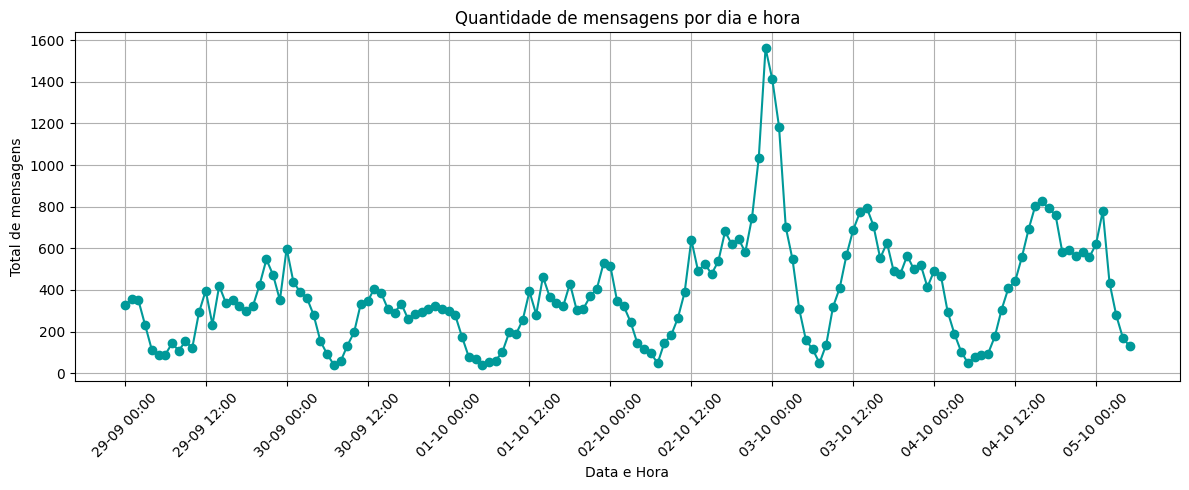

In [ ]:
resultado = conexao.execute("""
SELECT 
    CAST(date_message AS DATE) AS Dia, 
    date_part('hour', CAST(date_message AS TIMESTAMP)) AS Hora,
    COUNT(id_message) AS total
FROM 
    fake_telegram
GROUP BY 
    Dia, Hora
ORDER BY 
    Dia, Hora LIMIT 150;""").fetchdf()

#coluna juntando data e hora
resultado['DataHora'] = pd.to_datetime(
    resultado['Dia'].astype(str) + ' ' + resultado['Hora'].astype(int).astype(str) + ':00'
)

plt.figure(figsize=(12,5))
plt.plot(resultado['DataHora'], resultado['total'], color='#009999', marker = 'o')

plt.title('Quantidade de mensagens por dia e hora')
plt.xlabel('Data e Hora')
plt.ylabel('Total de mensagens')

#00:00 e 12:00
locs = resultado['DataHora'][
    resultado['DataHora'].dt.hour.isin([0, 12])
]
plt.xticks(locs, locs.dt.strftime('%d-%m %H:%M'), rotation=45)

#
plt.grid(True)
plt.tight_layout()

plt.show()

30. Quantidade de mensagens por hora; 


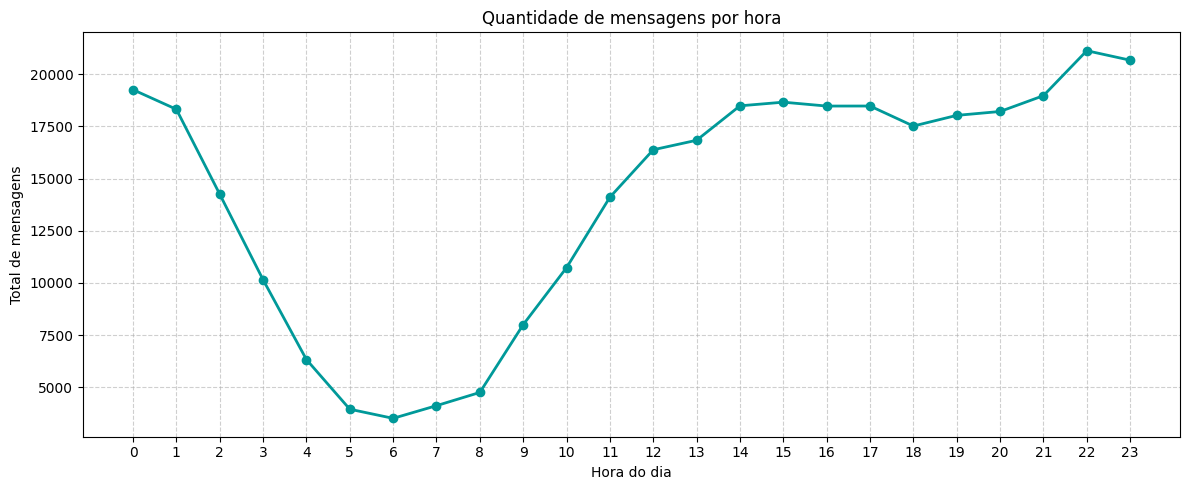

In [99]:
resultado = conexao.execute("""
SELECT 
    date_part('hour', CAST(date_message AS TIMESTAMP)) AS Hora,
    COUNT(id_message) AS total
FROM 
    fake_telegram
GROUP BY 
    Hora
ORDER BY 
    Hora;""").fetchdf()

plt.figure(figsize=(12,5))
plt.plot(resultado['Hora'], resultado['total'], marker='o', color='#009999', linewidth=2)

plt.title('Quantidade de mensagens por hora')
plt.xlabel('Hora do dia')
plt.ylabel('Total de mensagens')

plt.xticks(range(0, 24))  # Garante que apareçam todas as horas de 0 a 23
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [108]:
! pip install nltk
! pip install wordcloud


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\Clara Alyne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\Clara Alyne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud

nltk.download('stopwords')

31. A nuvem de palavras referente às mensagens de texto (após a remoção de
stop words); 

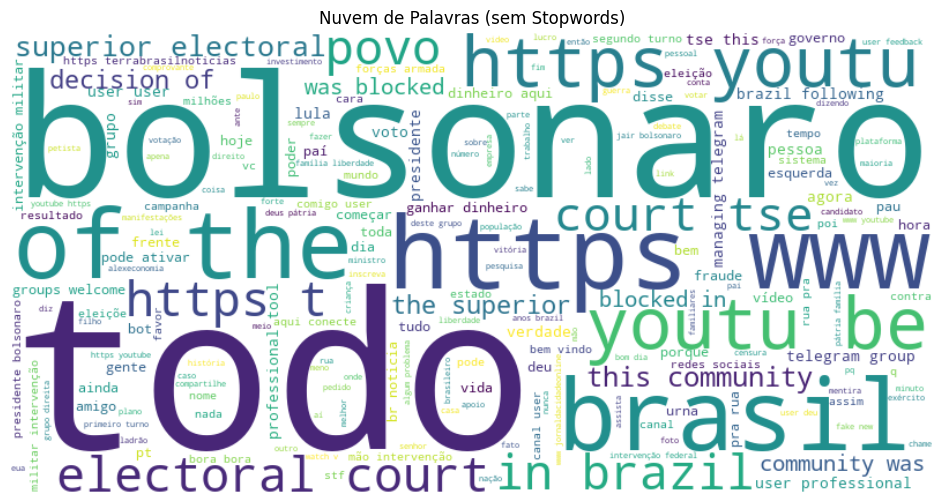

In [ ]:

resultado = conexao.execute("""
    SELECT text_content_anonymous
    FROM fake_telegram
    WHERE text_content_anonymous IS NOT NULL
    AND text_content_anonymous <> ''
""").fetchdf()

text = " ".join(resultado['text_content_anonymous'].astype(str)).lower()

# Definir stopwords em português 
stop_words = set(stopwords.words('portuguese'))


# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords= stop_words,
                      max_words=200,
                      colormap='viridis').generate(text)

# Mostrar a nuvem de palavras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras (sem Stopwords)")
plt.show()


32. A rede interativa das palavras referente às mensagens de texto (após a
remoção de stop words);

In [181]:
! pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 15.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\Clara Alyne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [189]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Clara
[nltk_data]     Alyne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Clara
[nltk_data]     Alyne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Clara
[nltk_data]     Alyne\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

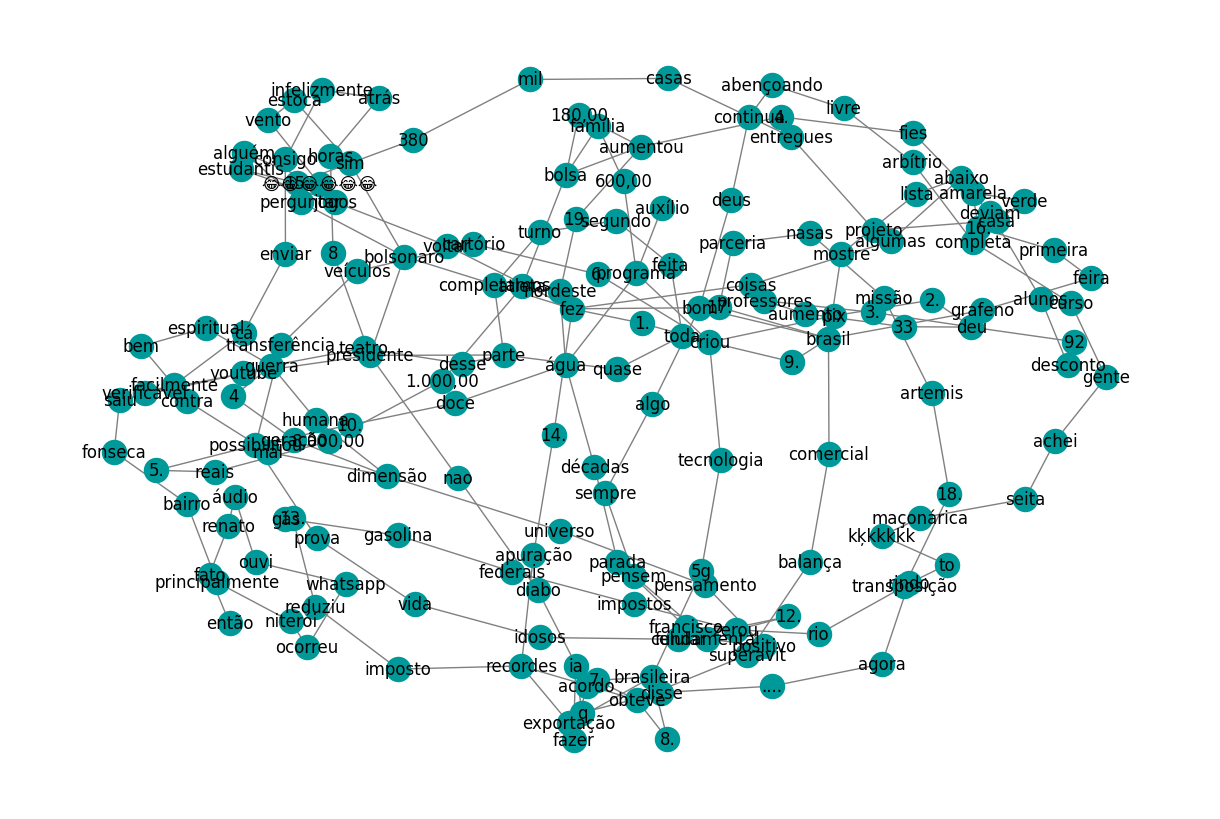

In [ ]:
from nltk.tokenize import word_tokenize
import networkx as nx
from collections import Counter

from nltk.corpus import stopwords

textos = df['text_content_anonymous'].dropna().astype(str).tolist()
tokens = word_tokenize(' '.join(textos).lower())

#Define as stop words e as pontuações
stop_words = set(stopwords.words('portuguese'))
stop_words.update(['.', ',', '!', '?', ':', ';','-','*','%','_' , '(', ')', '[', ']', '{', '}', '...'] )

#Remove as stop words e as pontuações
tokens = [token for token in tokens if token not in stop_words]

tokens = tokens[:200] #Limita a 200 tokens

edges = []

#Cria uma lista de pares de tokens consecutivos
for i in range(len(tokens) -1):
    edges.append((tokens[i], tokens[i + 1]))

edge_counts = Counter(edges)

G = nx.Graph() #Cria o grafo
for edge, weight in edge_counts.items(): #Adiciona as arestas ao grafo com o peso correspondente à frequência
    G.add_edge(edge[0], edge[1], weight=weight)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.2)
nx.draw(G, pos, with_labels=True, node_color='#009999', edge_color='gray')
plt.show()

33. Proporção de mensagens com e sem URL; 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


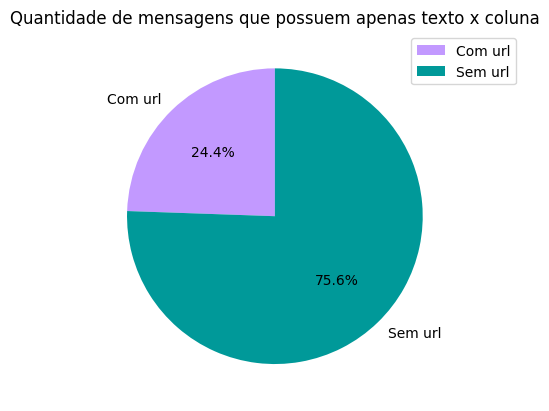

,total_com,total_sem
0,82936,256350


In [156]:

resultado = conexao.execute("""SELECT COUNT (has_media_url)
                            AS total_com FROM fake_telegram
                            WHERE has_media_url = True
                            ORDER BY total_com
                            DESC LIMIT 15""").fetchdf()

resultado1 = conexao.execute("""SELECT COUNT (has_media_url)
                            AS total_sem FROM fake_telegram
                            WHERE has_media_url = False
                            ORDER BY total_sem
                            DESC LIMIT 15""").fetchdf()

resultado2 = pd.concat([resultado, resultado1], axis=1)

labels = ['Com url', 'Sem url']
cores = ['#c299ff', '#009999']
plt.axis('equal')
plt.title('Quantidade de mensagens que possuem apenas texto x coluna')
plt.pie(resultado2.iloc[0], labels=labels, colors=cores, autopct='%1.1f%%', startangle=90)
plt.legend()
plt.show()


resultado2



34. Proporção de desinformação; 


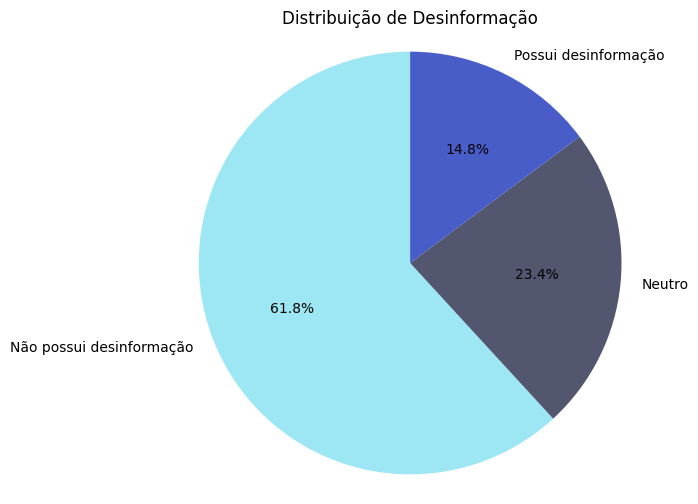

,categoria,total
0,Não possui desinformação,103387
1,Neutro,39083
2,Possui desinformação,24754


In [ ]:
resultado = conexao.execute("""
SELECT 
    CASE 
        WHEN score_misinformation <= 0.3 THEN 'Não possui desinformação'
        WHEN score_misinformation >= 0.7 THEN 'Possui desinformação'
        ELSE 'Neutro'
    END AS categoria,
    COUNT(*) AS total
    FROM fake_telegram
    WHERE score_misinformation IS NOT NULL
    GROUP BY categoria
    ORDER BY total DESC;
    """).fetchdf()

plt.figure(figsize=(6,6))
plt.title('Distribuição de Desinformação')

plt.pie(
    resultado['total'],
    labels=resultado['categoria'],
    colors=["#9de7f4", "#52566E", '#485DC7'],
    autopct='%1.1f%%',
    startangle=90
)

plt.axis('equal')
plt.show()

resultado

35. Proporção de mensagens contendo mídia e desinformação; 

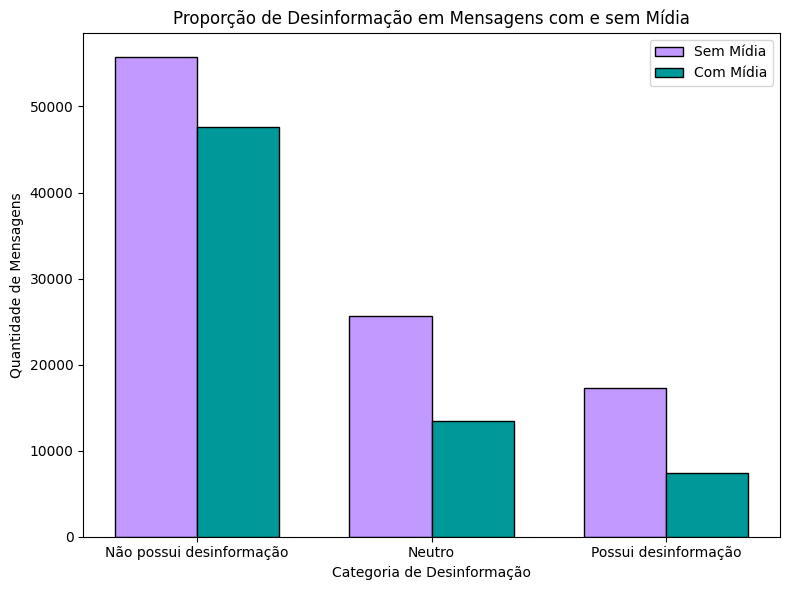

,categoria,total,has_media
0,Não possui desinformação,55769,False
1,Não possui desinformação,47618,True
2,Neutro,25677,False
3,Possui desinformação,17295,False
4,Neutro,13406,True
5,Possui desinformação,7459,True


In [ ]:
resultado = conexao.execute("""
SELECT 
    CASE 
        WHEN score_misinformation <= 0.3 THEN 'Não possui desinformação'
        WHEN score_misinformation >= 0.7 THEN 'Possui desinformação'
        ELSE 'Neutro'
    END AS categoria,
    COUNT(*) AS total,
    has_media
FROM fake_telegram
WHERE score_misinformation IS NOT NULL
GROUP BY categoria, has_media
ORDER BY total DESC;
""").fetchdf()


# Organizando os dados com pivot_table
tabela = resultado.pivot_table(
    index='categoria',
    columns='has_media',
    values='total',
    fill_value=0
)

#Ordenando a tabela
tabela = tabela.reindex(['Não possui desinformação', 'Neutro', 'Possui desinformação'])

sem_midia = tabela[False].values
com_midia = tabela[True].values

x = np.arange(len(tabela.index))  # posições no eixo X
largura = 0.35 

plt.figure(figsize=(8,6))
plt.bar(x - largura/2, sem_midia, width=largura, color='#c299ff', label='Sem Mídia', edgecolor='black') #esquerda
plt.bar(x + largura/2, com_midia, width=largura, color='#009999', label='Com Mídia', edgecolor='black') #direita


plt.title('Proporção de Desinformação em Mensagens com e sem Mídia')
plt.ylabel('Quantidade de Mensagens')
plt.xlabel('Categoria de Desinformação')
plt.xticks(x, tabela.index) 
plt.legend()

plt.tight_layout()
plt.show()
resultado


36. Distribuição de mensagens por score de desinformação; 


C:\Users\Clara Alyne\AppData\Local\Temp\ipykernel_14884\1852766689.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


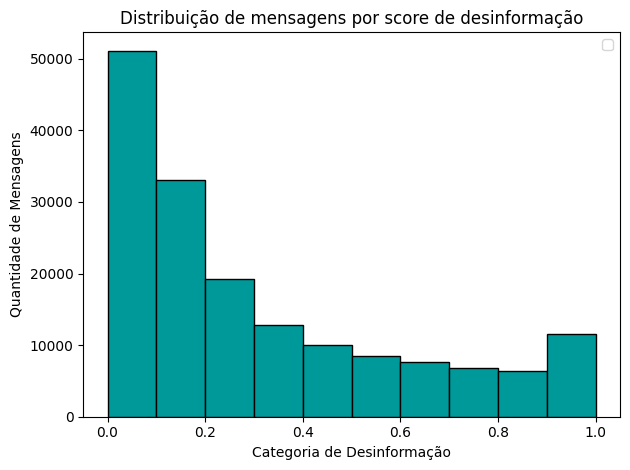

In [170]:
plt.hist(df["score_misinformation"],edgecolor='black', color='#009999')
plt.title('Distribuição de mensagens por score de desinformação')
plt.ylabel('Quantidade de Mensagens')
plt.xlabel('Categoria de Desinformação')

plt.legend()

plt.tight_layout()
plt.show()


37. Proporção de sentimentos; 


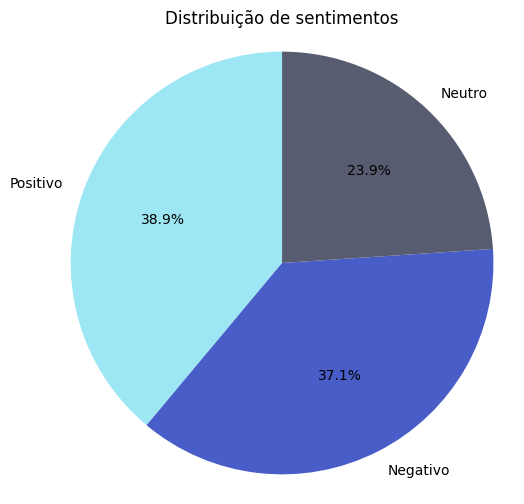

,categoria,total
0,Positivo,132045
1,Negativo,125979
2,Neutro,81215


In [172]:
resultado = conexao.execute("""
SELECT 
    CASE 
        WHEN score_sentiment < -0.05 THEN 'Negativo'
        WHEN score_sentiment > 0.05 THEN 'Positivo'
        ELSE 'Neutro'
    END AS categoria,
    COUNT(*) AS total
    FROM fake_telegram
    WHERE score_sentiment IS NOT NULL
    GROUP BY categoria
    ORDER BY total DESC;
    """).fetchdf()

plt.figure(figsize=(6,6))
plt.title('Distribuição de sentimentos')

plt.pie(
    resultado['total'],
    labels=resultado['categoria'],
    colors=["#9de7f4", "#485DC7", "#585C70"],
    autopct='%1.1f%%',
    startangle=90
)

plt.axis('equal')
plt.show()

resultado

38. Distribuição de mensagens por score de sentimentos; 

C:\Users\Clara Alyne\AppData\Local\Temp\ipykernel_14884\4159500004.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


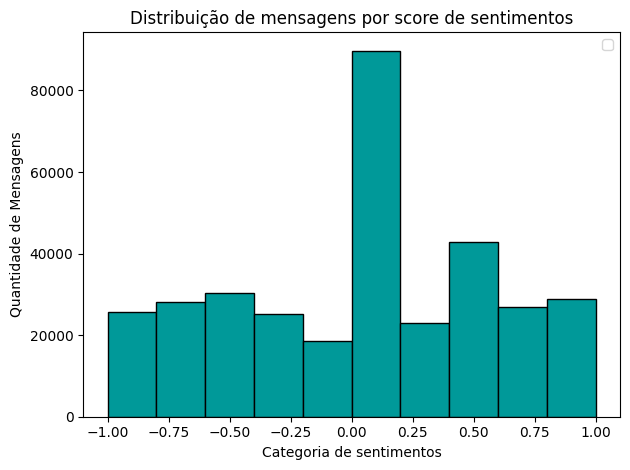

In [174]:
plt.hist(df["score_sentiment"],edgecolor='black', color='#009999')
plt.title('Distribuição de mensagens por score de sentimentos')
plt.ylabel('Quantidade de Mensagens')
plt.xlabel('Categoria de sentimentos')

plt.legend()

plt.tight_layout()
plt.show()


39. Proporção entre mensagens virais e não virais; 


In [176]:
#criar nova coluna viral (1 se for viral e 0 se não for viral)
df["viral"] = df.duplicated(subset="text_content_anonymous", keep=False).astype(int)
print(df["viral"])

conexao.register("fake_telegram", df)


0         0
1         0
2         0
3         0
5         0
         ..
557564    1
557565    1
557567    1
557568    1
557569    1
Name: viral, Length: 339286, dtype: int64


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


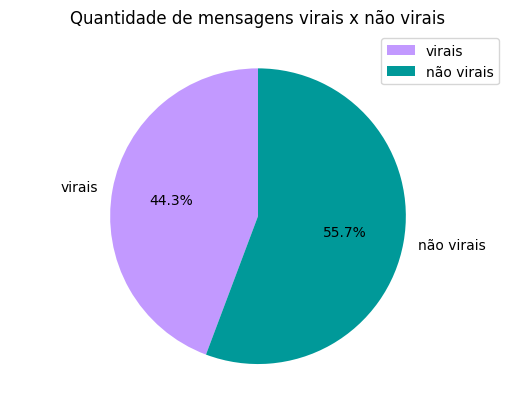

,total_viral,total_n_viral
0,150229,189057


In [179]:
resultado = conexao.execute("""SELECT COUNT (viral)
                            AS total_viral FROM fake_telegram
                            WHERE viral = 1
                            ORDER BY total_viral
                            """).fetchdf()

resultado1 = conexao.execute("""SELECT COUNT (viral)
                            AS total_n_viral FROM fake_telegram
                            WHERE viral = 0
                            """).fetchdf()

resultado2 = pd.concat([resultado, resultado1], axis=1)

labels = ['virais', 'não virais']
cores = ['#c299ff', '#009999']
plt.axis('equal')
plt.title('Quantidade de mensagens virais x não virais')
plt.pie(resultado2.iloc[0], labels=labels, colors=cores, autopct='%1.1f%%', startangle=90,)
plt.legend()
plt.show()


resultado2


40. Algo que você julga importante e que ainda não foi solicitado; 


In [200]:
#O dia que foi publicado o menor número de mensagens
resultado = conexao.execute("""SELECT CAST (date_message AS DATE) AS Dia, COUNT(id_message)
                            AS total
                            FROM fake_telegram
                            GROUP BY Dia
                            ORDER BY total
                            LIMIT 1""").fetchdf()
resultado

,Dia,total
0,2022-11-11,1815
